In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("test.csv")
df.head()
#df.fillna(df.mean(), inplace=True)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Independent variables (all except price_range)
X = df.drop('price_range', axis=1)
# Dependent variable (target)
y = df['price_range']

In [5]:
# SVM is sensitive to feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n✅ Feature Scaling Completed!")



✅ Feature Scaling Completed!


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)
print(f"\nTraining Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")



Training Data Shape: (1400, 20)
Testing Data Shape: (600, 20)


In [7]:
kernels = ['linear', 'poly', 'rbf']
accuracies = {}

for kernel in kernels:
    print(f"\n🔹 Training SVM with {kernel.upper()} kernel...")
    model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies[kernel] = acc * 100
    
    print(f"Accuracy ({kernel} kernel): {acc*100:.2f}%")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


🔹 Training SVM with LINEAR kernel...
Accuracy (linear kernel): 95.33%

Confusion Matrix:
[[142   9   0   0]
 [  4 141   1   0]
 [  0   8 135   5]
 [  0   0   1 154]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       151
           1       0.89      0.97      0.93       146
           2       0.99      0.91      0.95       148
           3       0.97      0.99      0.98       155

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.96      0.95      0.95       600


🔹 Training SVM with POLY kernel...
Accuracy (poly kernel): 78.50%

Confusion Matrix:
[[120  31   0   0]
 [ 11 112  23   0]
 [  0  25 111  12]
 [  0   0  27 128]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       151
           1       0.67      0.77      0.71       146
           2       0.69 


📊 Accuracy Comparison:
LINEAR Kernel: 95.33%
POLY Kernel: 78.50%
RBF Kernel: 86.83%


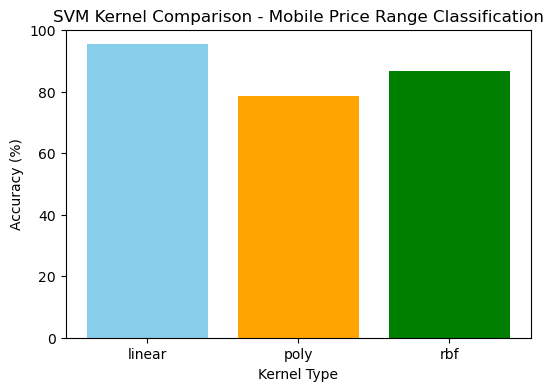

In [8]:
print("\n📊 Accuracy Comparison:")
for k, v in accuracies.items():
    print(f"{k.upper()} Kernel: {v:.2f}%")

# Plot accuracies for comparison
plt.figure(figsize=(6, 4))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'orange', 'green'])
plt.title("SVM Kernel Comparison - Mobile Price Range Classification")
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy (%)")
plt.show()

In [9]:
new_phone = np.array([[1821, 0, 1.7, 0, 4, 1, 10, 0.8, 139, 8, 10, 381, 1018, 3220, 13, 8, 18, 1, 0, 1]])

# Scale the input
new_phone_scaled = scaler.transform(new_phone)

# Use the best model (say RBF kernel)
best_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
best_model.fit(X_train, y_train)
pred = best_model.predict(new_phone_scaled)

print("\n🔹 Predicted Price Range for the New Phone:", int(pred[0]))


🔹 Predicted Price Range for the New Phone: 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
